In [1]:
import os
import pandas as pd

os.chdir('..')

In [66]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-darkgrid")
def plotting_fn(df,title, name, smoothing_factor=0):
    fig, ax = plt.subplots(figsize=(8,5))
    ax.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    ax.tick_params(axis='both', which='major', labelsize=15)
    df.ewm(alpha=smoothing_factor).mean().plot(ax=ax)
    ax.set_xlabel("Environment interactions", fontsize=15)
    ax.set_ylabel("Avg. reward", fontsize=15)
    ax.set_title(title, fontsize=15);
    fig.tight_layout()
    fig.savefig(f"figures/{name}.png", dpi=600)

In [67]:
def get_data_environment(env_name):
    #root = os.path.join(os.getcwd(), f"KUCodebase\code\\runs") # Jesp
    root = os.path.join(os.getcwd(), f"KUCodebase/code/runs") # AK
    files = [os.path.join(path, name) for path, subdirs, files in os.walk(root) for name in files if "reward" in name and env_name in path]

    #df = pd.concat([pd.read_csv(p, header=None, index_col = 0,names=["it", p.split("runs")[-1].split("\\")[1]], usecols=[0,1]) for p in files], axis=1) # Jesp
    df = pd.concat([pd.read_csv(p, header=None, index_col = 0,names=["it", p.split("runs")[-1].split("/")[1].upper()], usecols=[0,1]) for p in files], axis=1) # AK

    return df


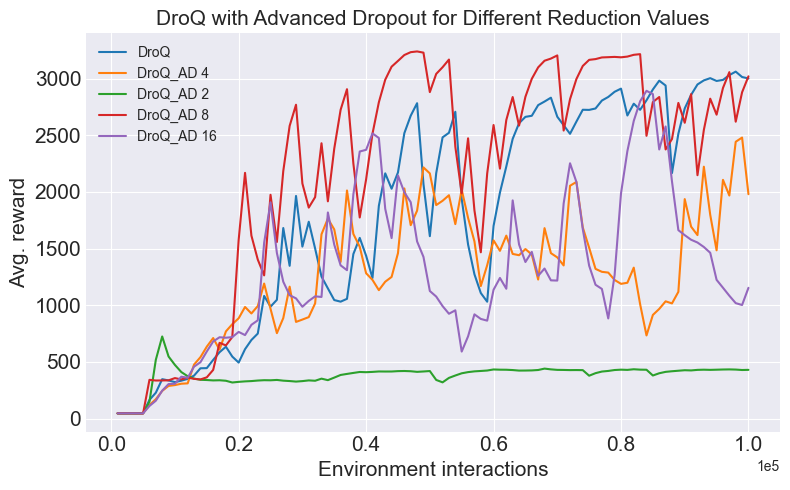

In [68]:
env_name = "Hopper-v2"
df_hopper = get_data_environment(env_name)
df_hopper.rename(columns= {'DRQ':'DroQ', 'DRQ_ADVANCED_2':'DroQ_AD 2','DRQ_ADVANCED_4':'DroQ_AD 4','DRQ_ADVANCED_8':'DroQ_AD 8', 'DRQ_ADVANCED_16':'DroQ_AD 16'}, inplace=True)
plotting_fn(df_hopper[['DroQ','DroQ_AD 4','DroQ_AD 2','DroQ_AD 8','DroQ_AD 16']], 'DroQ with Advanced Dropout for Different Reduction Values', 'ReductionHyperparameter',smoothing_factor=0.4)

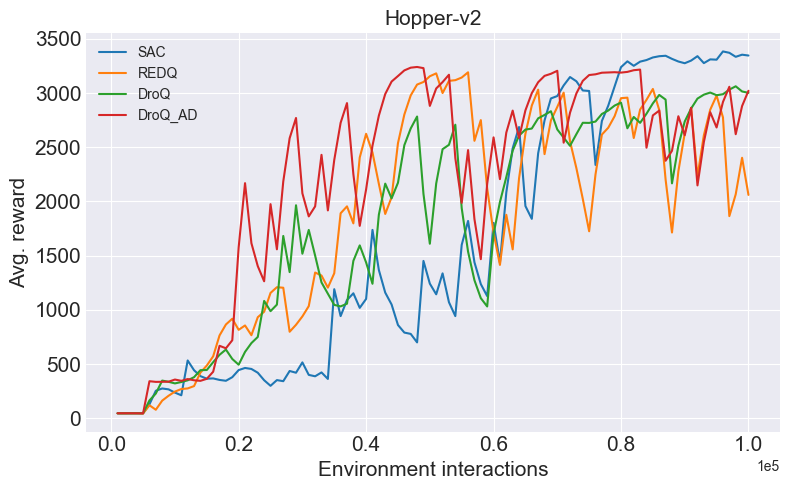

In [69]:
algo = ['SAC', 'REDQ','DroQ','DroQ_AD']
env_name = "Hopper-v2"
df_hopper = get_data_environment(env_name)
df_hopper.rename(columns= {'DRQ':'DroQ', 'DRQ_ADVANCED_8':'DroQ_AD'}, inplace=True)
plotting_fn(df_hopper[algo], env_name, env_name,smoothing_factor=0.4)

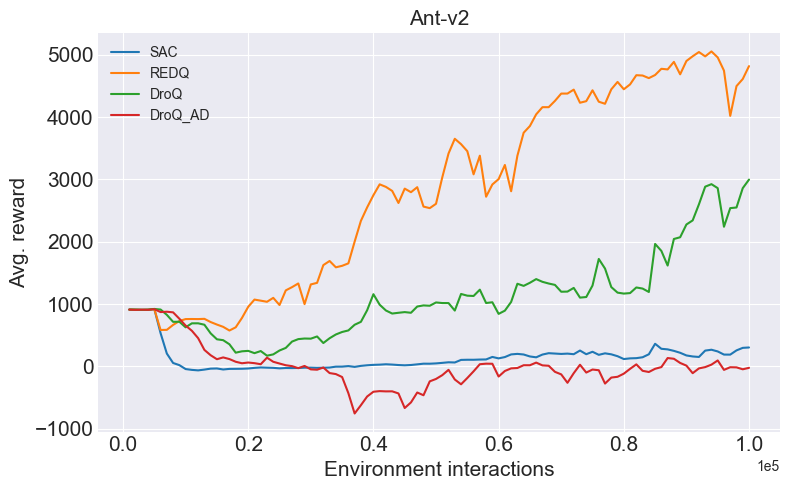

In [70]:
env_name = "Ant-v2"
df_ant = get_data_environment(env_name)
df_ant.rename(columns= {'DRQ':'DroQ', 'DRQ_ADVANCED_8':'DroQ_AD'}, inplace=True)
plotting_fn(df_ant[algo], env_name, env_name, smoothing_factor=0.4)

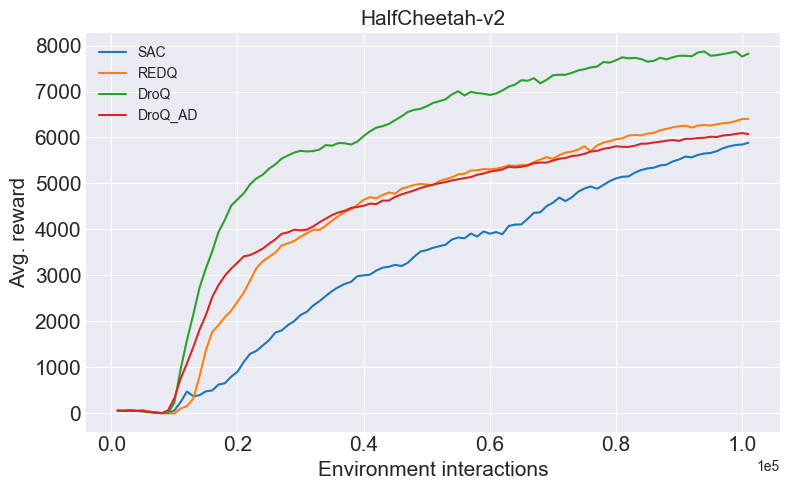

In [71]:
env_name = "HalfCheetah-v2"
df_cheetah = get_data_environment(env_name)
df_cheetah.rename(columns= {'DRQ':'DroQ', 'DRQ_ADVANCED_8':'DroQ_AD'}, inplace=True)
plotting_fn(df_cheetah[algo], env_name, env_name, smoothing_factor=0.4)

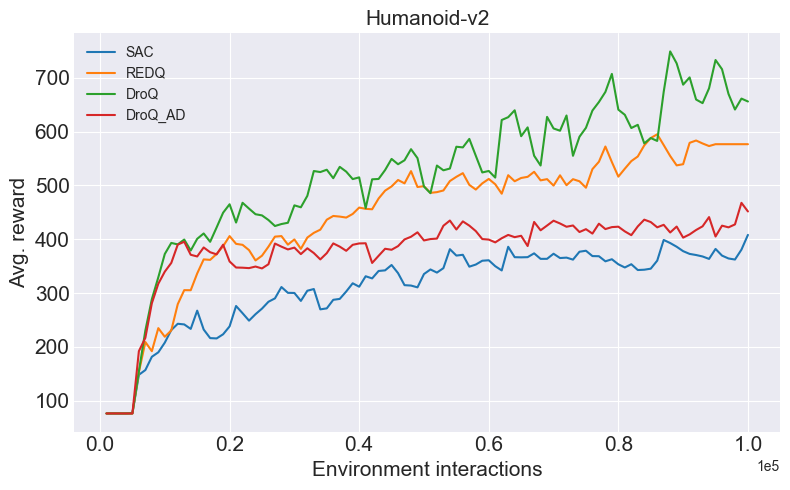

In [72]:
env_name = "Humanoid-v2"
df_humanoid = get_data_environment(env_name)
df_humanoid.rename(columns= {'DRQ':'DroQ', 'DRQ_ADVANCED_8':'DroQ_AD'}, inplace=True)
plotting_fn(df_humanoid[algo], env_name, env_name, smoothing_factor=0.4)

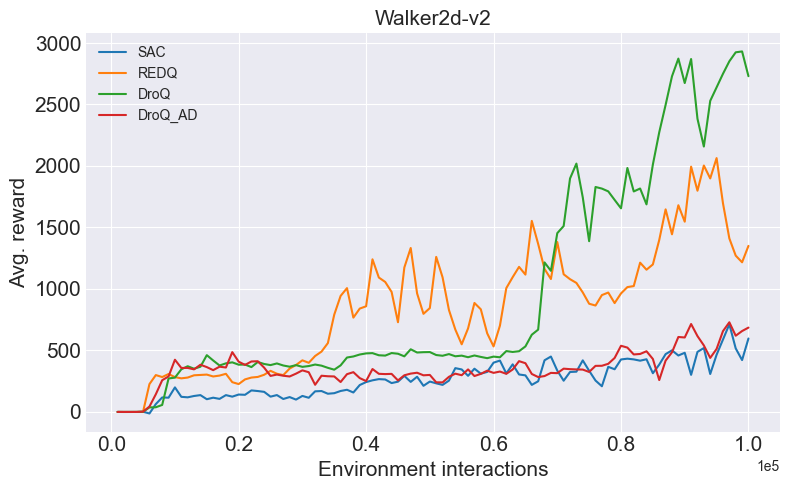

In [73]:
env_name = "Walker2d-v2"
df_walker2d = get_data_environment(env_name)
df_walker2d.rename(columns= {'DRQ':'DroQ', 'DRQ_ADVANCED_8':'DroQ_AD'}, inplace=True)
plotting_fn(df_walker2d[algo], env_name, env_name, smoothing_factor=0.4)

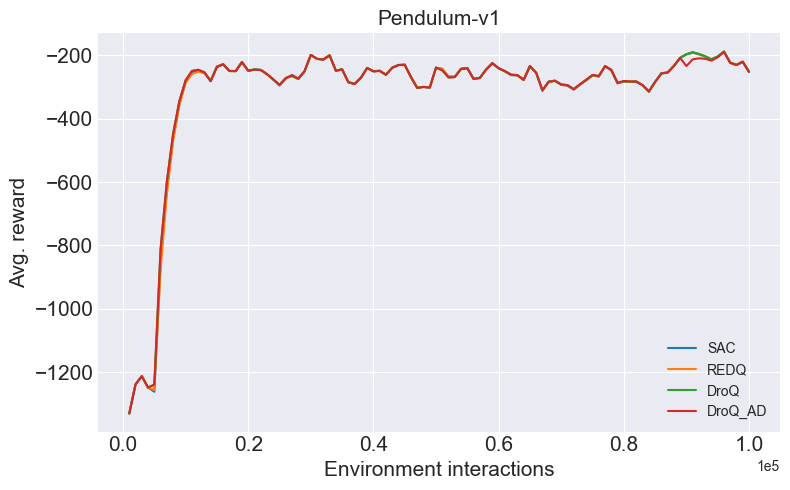

In [74]:
env_name = "Pendulum-v1"
df_pendulum = get_data_environment(env_name)
df_pendulum.rename(columns= {'DRQ':'DroQ', 'DRQ_ADVANCED_8':'DroQ_AD'}, inplace=True)
plotting_fn(df_pendulum[algo], env_name, env_name, smoothing_factor=0.4)

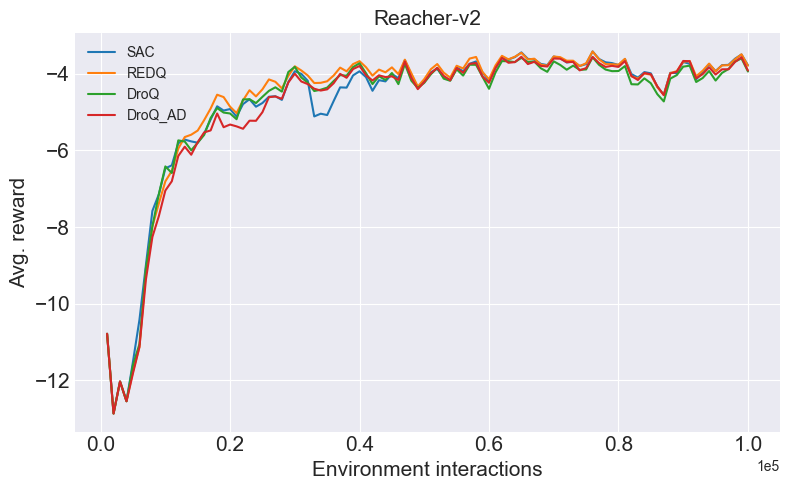

In [75]:
env_name = "Reacher-v2"
df_reacher = get_data_environment(env_name)
df_reacher.rename(columns= {'DRQ':'DroQ', 'DRQ_ADVANCED_8':'DroQ_AD'}, inplace=True)
plotting_fn(df_reacher[algo], env_name, env_name, smoothing_factor=0.4)

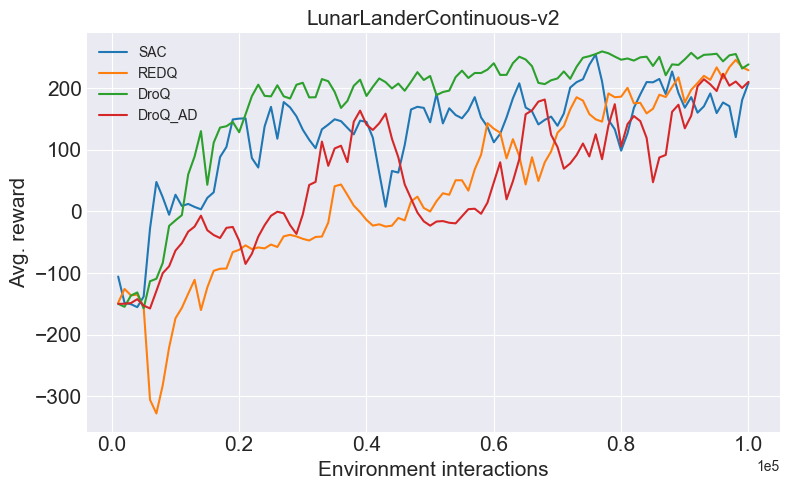

In [76]:
env_name = "LunarLanderContinuous-v2"
df_lunarlander = get_data_environment(env_name)
df_lunarlander.rename(columns= {'DRQ':'DroQ', 'DRQ_ADVANCED_8':'DroQ_AD'}, inplace=True)
plotting_fn(df_lunarlander[algo], env_name, env_name, smoothing_factor=0.4)

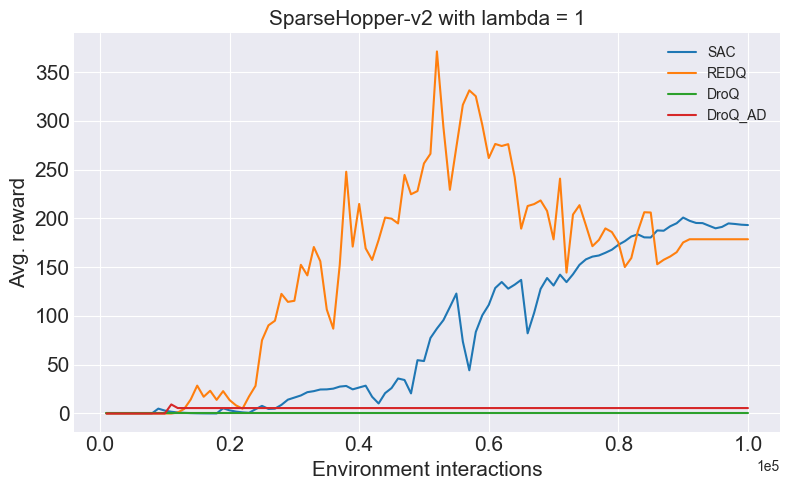

In [77]:
env_name = "Hopper-v2"
df_hopper = get_data_environment(env_name)
df_hopper = df_hopper.loc[:, ['REDQ_LAMBDA_1', 'DRQ_LAMBDA_1', 'SAC_LAMBDA_1', 'DRQ_ADVANCED_8_LAMBDA_1']]
df_hopper.rename(columns= {'REDQ_LAMBDA_1': 'REDQ', 'DRQ_LAMBDA_1':'DroQ', 'SAC_LAMBDA_1':'SAC', 'DRQ_ADVANCED_8_LAMBDA_1':'DroQ_AD'}, inplace=True)
plotting_fn(df_hopper[algo], 'SparseHopper-v2 with lambda = 1', 'sparsehopper_lambda1', smoothing_factor=0.4)

In [65]:
env_name = "Hopper-v2"
df_hopper = get_data_environment(env_name)
df_hopper = df_hopper.loc[:, ['REDQ_LAMBDA_3', 'DRQ_LAMBDA_3', 'SAC_LAMBDA_3', 'DRQ_ADVANCED_8_LAMBDA_3']]
df_hopper.rename(columns= {'REDQ_LAMBDA_3': 'REDQ', 'DRQ_LAMBDA_3':'DroQ', 'SAC_LAMBDA_3':'SAC', 'DRQ_ADVANCED_8_LAMBDA_3':'DroQ_AD'}, inplace=True)
plotting_fn(df_hopper[algo], 'SparseHopper-v2 with lambda = 3', 'sparsehopper_lambda3', smoothing_factor=0.4)

KeyError: "['REDQ_LAMBDA_3'] not in index"